# 코로나19는 주린이의 선택을 어떻게 바꿀까?
## - 주가에 영향을 미치는 코로나19와 기타 변수 분석 및 시각화 프로젝트

---
데잇걸즈4 ITR4 TEAM5 - 김소이, 김해인, 박유빈, 여지영, 오수희

발표일: 2020. 10. 16.(금) / 최종 제출일: 2020. 10. 20.(화)


**목차**

- **서론**
- **본론1. 원본데이터 전처리**
    - 1-1. 코로나19 데이터  
    - 1-2. 주가 데이터  
    - 1-3. 뉴스 데이터  
    - 1-4. 독립변수 / 종속변수 정리  
- **본론2. EDA시각화 및 회귀분석**
    - 2-1. EDA 시각화  
    - 2-2. 회귀분석
- **결론 및 한계점**

---

# 서론

### 프로젝트 배경
![title](img03.png)
- 한국은 코로나19가 비교적 초기에 발생했음에도 불구하고, 확진자 및 사망자 수가 전 세계의 다른 국가에 비하면 매우 낮고, 완치율 또한 매우 높은 편에 속한다. 몇 차례의 집단 감염 사례가 발생한 이후에도 안정적인 회복세를 보이고 있기도 하다. 그러나 완전히 달라져버린 생활 양식과 엄격한 사회규율, 이로 인한 경제적 타격으로 많은 국민이 전에 겪지 못한 어려운 시기를 보내고 있다. 이런 시기에 주식에 투자한다는 것은 도박일까, 기회일까? 데잇걸즈 5조는 **특정 기업이나 산업군의 주가가 코로나19의 영향을 어느 정도로 받고 있는지, 코로나19 관련 요소로부터 주가를 예측할 수 있을지 궁금해졌다.**
- 하지만 많은 주알못, 경알못들이 쉽게 간과할수 있는 사실이 있다. 어떤 단일한 요인에 의해서 주가의 등락이 결정되지는 않는다는 점이다. 이에, 5조는 **코로나19와 관련된 요소를 우선적으로 탐구하고, 만일 그 결과가 충분히 유의미하지 않을 경우 그 이유와 다른 요인을 함께 탐색**해보기로 하였다.

### 분석 목적 및 분석 방법
- 이 분석이 목적은 코로나19가 특정 한국 기업의 주가에 영향을 주는지 알아보는 것이다. 사실 방점은 코로나19보다 종속변수인 주가에 찍혀있는데, 주린이의 입장에서 전염병과 같은 큰 사회적 이슈가 있을 때 주가에 대해 어떻게 생각해보면 좋을지 알아보는 데에 의의가 있기 때문이다. 분석을 통해 현재와 같은 상황에서 주가를 볼 때, 코로나19 관련 변수를 얼마나 고려해야 하는지 생각해볼 수 있다.
- 다중회귀분석을 통해 대표 2개 기업의 주가와 독립변수들의 관계를 자세히 살펴본다. 이후 2개 기업이 각각 속한 업종 분류 총 30개 기업의 분석 결과를 요약, 정리한다.

### 종속/독립변수 설정

**종속변수** 
네이버 금융, 증권플러스 등 대표적인 주식 포털에서 업종 기준으로 삼는 WICS를 분류 기준으로, 소분류상 **양방향미디어와서비스**와 **호텔, 레스토랑, 레저** 두 개 업종에 속한 기업들의 주가를 대상으로 하였다. 흔히 코로나19로 인해 흥한 업종, 쇠한 업종이라 불리는 두 업종을 선택했다.   
   - (연속형) **양뱡향미디어와서비스** 업종 10개 기업
   - (연속형) **호텔, 레스토랑, 레저** 업종 20개 기업


**독립변수**  
   - (연속형) **한국 코로나 신규 확진자 수**
   - (연속형) **한국 코로나 신규 사망자 수**
   - (연속형) **세계 코로나 신규 확진자 수**
   - (연속형) **한국은행 통화 유동성 관련 키워드 뉴스 수**
   - (연속형) **미 연방준비제도 통화 유동성 관련 키워드 뉴스 수**
   - (연속형) **나스닥 지수**

### 사용 데이터셋
<수집기간과 단위>
- Datetime 라이브러리에서 해당 연도의 몇 주차인지 알려주는 함수를 사용해 '주차'를 기준으로 한다.
- 주가는 주말 및 공휴일에는 존재하지 않고, 주가 관련 데이터는 합계나 평균을 내기 어렵다.  
  따라서 전문가의 조언에 따라 '해당 주차 금요일 주가'를 '해당 주차 주가'로 가정한다
- 그 외에 코로나와 뉴스 데이터는 '해당 주차 주간 합계'를 구해서 넣는다.
- 대한민국 첫 확진자 발생일은 1월 19일(일)이다.그러나 확진자가 0명이었던 날을 추가하기 위해 1월 17일(금)을 시작 날짜로 한다.
- 금요일을 기준으로 삼는 주식 데이터 사용의 용이성을 위해 올해(2020년) 금요일이 공휴일인 주차를 제외한 10월 9일(금)을 종료 날짜로 한다.
- 따라서 데이터 수집 기간은 아래와 같다.
    - **2020년 1월 17일(금) ~ 2020년 10월 9일(금)**


<코로나 관련 데이터>

- (WHO 세계보건기구) 국가별 코로나19 확진자, 사망자 정보
- (WHO 세계보건기구) 국가별 코로나19 확진자, 사망자 정보

<주가 관련 데이터>

- (네이버 금융, 한국거래소) 특정 기업 주가
- (한국거래소) KOSPI, KOSDAQ, NASDAQ
- (WISEfn) WICS 업종 분류 지수

<뉴스 데이터>

- (한국언론진흥재단 빅카인즈) 정부의 미래 투자 산업 관련 키워드 뉴스 데이터
- (한국언론진흥재단 빅카인즈) 정부, 한국은행의 통화 정책 관련 키워드 뉴스 데이터
- (한국언론진흥재단 빅카인즈) 미국 연방준비제도(FED) 통화 정책 관련 키워드 뉴스 데이터

### 사용 라이브러리

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot
import matplotlib.pylab as pylab
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

from datetime import datetime
import requests
from bs4 import BeautifulSoup
import FinanceDataReader as fdr
import warnings
warnings.filterwarnings(action='ignore')


---


# 본론1. 원본 데이터 전처리

## 1-1. 코로나 데이터

---

- 원본데이터 출처: 세계보건기구(WHO) 링크  
  '1014-WHO-COVID-19-global-data.csv' (세계보건기구의 전세계 일일 확진자/사망자 추이)
- 불필요한 컬럼은 제외하고 주차별 주간 신규확진자/사망자 합계를 구한 칼럼을 추가했다.


**WD_covid**
- 날짜
- 주차
- 세계 주간 확진자 / 세계 주간 사망자

**KR_covid**
- 날짜
- 주차
- 한국 주간 확진자 / 한국 주간 사망자

**독립_KR_WD_covid_death**
- 날짜
- 주차
- 한국 주간 확진자 / 한국 주간 사망자 / 세계 주간 확진자

In [2]:
import pandas as pd
from datetime import datetime

In [4]:
# 원본데이터
covid_raw = pd.read_csv('1014-WHO-COVID-19-global-data.csv')
covid_raw.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020.1.3,AF,Afghanistan,EMRO,0,0,0,0
1,2020.1.4,AF,Afghanistan,EMRO,0,0,0,0
2,2020.1.5,AF,Afghanistan,EMRO,0,0,0,0
3,2020.1.6,AF,Afghanistan,EMRO,0,0,0,0
4,2020.1.7,AF,Afghanistan,EMRO,0,0,0,0


### 1) 세계 '주간 확진자/사망자 수'

In [5]:
# 필요한 컬럼만 남기기
wd_covid = covid_raw[['Date_reported', ' New_cases', ' New_deaths']]
# 컬럼명 변경하기
wd_covid = covid_raw.rename(columns={
                            'Date_reported': 'Date', ' New_cases': 'WD_daily_covid', ' New_deaths': 'WD_daily_death'})

# 날짜 정보를 데이터 타입 Datetime 으로 변경하기
wd_covid["Date"] = pd.to_datetime(wd_covid["Date"])

# '주차' 데이터 생성 및 추가하기.
# 이때 '주차'는 해당 연도의 몇 번째 주차인지를 의미 함.
wd_covid["Week"] = wd_covid["Date"].dt.week
wd_covid = wd_covid[['Date', 'Week', 'WD_daily_covid', 'WD_daily_death']]

# '요일' 데이터 생성 및 추가하기.
# 이때 '요일'은 '월:0 ~일:6'
wd_covid["Day"] = wd_covid["Date"].dt.dayofweek
wd_covid = wd_covid[['Date', 'Week', 'Day',
                     'WD_daily_covid', 'WD_daily_death']]


# '주차' groupby 하고 '일일확진자' 합계로 '주간 확진자수' 구하기.
world_w = wd_covid.groupby(["Week"])["WD_daily_covid"].sum()
world_weekly = pd.DataFrame(world_w)
world_weekly.columns = ["WD_covid"]
# merge 를 통해 기존 데이터에 추가하기.
wd_covid = wd_covid.merge(world_weekly, left_on="Week",
                          right_on=world_weekly.index, how="left")

world_wd = wd_covid.groupby(["Week"])["WD_daily_death"].sum()
world_weekly_d = pd.DataFrame(world_wd)
world_weekly_d.columns = ["WD_death"]
wd_covid = wd_covid.merge(world_weekly_d, left_on="Week",
                          right_on=world_weekly.index, how="left")

# 최종 원하는 데이터는 '주간 확진자'와 '주간 사망자'.
# 금요일 주가를 기준으로 하는 주가 데이터와 합칠 예정이므로 금요일만 남기기.
wd_covid = wd_covid[wd_covid['Day'].isin([4])]

# 원하는 컬럼만 남기기.
wd_covid = wd_covid[['Date', 'Week', 'WD_covid', 'WD_death']]

# 중복값 제거하기.
wd_covid = wd_covid.drop_duplicates()

# 0117 ~ 0925 의 데이터만 남기기.
# 야매 코딩 - 그냥 인덱스 번호 일일이 확인하고 자름
wd_covid = wd_covid.drop([0, 7, 273, 280])

In [13]:
# 저장하기
wd_covid.to_excel("독립_WD_covid.xlsx", index=False, encoding="utf8")
wd_covid = pd.read_excel("독립_WD_covid.xlsx")
wd_covid.head()

,Date,Week,WD_covid,WD_death
0,2020-01-17,3,92,2
1,2020-01-24,4,1928,53
2,2020-01-31,5,12561,249
3,2020-02-07,6,23013,508
4,2020-02-14,7,31714,857


### 2) 한국 '주간 확진자/사망자 수'

In [7]:
# 원본에서 필요한 컬럼만 남기기
kr_covid = covid_raw[covid_raw[' Country_code'].isin(['KR'])]
# 컬럼명 변경하기
kr_covid = kr_covid[['Date_reported', ' New_cases', ' New_deaths']]
kr_covid = kr_covid.rename(columns={
                           'Date_reported': 'Date', ' New_cases': 'KR_daily_covid', ' New_deaths': 'KR_daily_death'})

# 날짜 정보를 데이터 타입 Datetime 으로 변경하기
kr_covid['Date'] = pd.to_datetime(kr_covid['Date'])

# '주차' 데이터 생성 및 추가하기.
kr_covid['Week'] = kr_covid['Date'].dt.week
kr_covid = kr_covid[['Date', 'Week', 'KR_daily_covid', 'KR_daily_death']]

# '요일' 데이터 생성 및 추가하기
kr_covid["Day"] = kr_covid['Date'].dt.dayofweek
kr_covid = kr_covid[['Date', 'Week', 'Day',
                     'KR_daily_covid', 'KR_daily_death']]


# '주차' groupby 하고 '일일확진자' 합계로 '주간 확진자수' 구하기.
korea_w = kr_covid.groupby(["Week"])["KR_daily_covid"].sum()
korea_weekly = pd.DataFrame(korea_w)
korea_weekly.columns = ["KR_covid"]
# merge 를 통해 기존 데이터에 추가하기.
kr_covid = kr_covid.merge(korea_weekly, left_on="Week",
                          right_on=korea_weekly.index, how="left")

# '주간 사망자수'
korea_wd = kr_covid.groupby(["Week"])["KR_daily_death"].sum()
korea_weekly_d = pd.DataFrame(korea_wd)
korea_weekly_d.columns = ["KR_death"]
korea_weekly_d.head()
kr_covid = kr_covid.merge(korea_weekly_d, left_on="Week",
                          right_on=korea_weekly_d.index, how="left")

# 최종 원하는 데이터는 '주간 확진자'와 '주간 사망자'.
# 금요일 주가를 기준으로 하는 주가 데이터와 합칠 예정이므로 금요일만 남기기.
kr_covid = kr_covid[kr_covid['Day'].isin([4])]

# 0117 ~ 0925 의 데이터만 남기기.
# 야매 코딩 - 그냥 인덱스 번호 일일이 확인하고 자름
kr_covid = kr_covid.drop([0, 7, 273, 280])

# 필요한 컬럼만 남기기.
kr_covid = kr_covid[['Date', 'Week', 'KR_covid', 'KR_death']]

In [12]:
#저장하기
kr_covid.to_excel("독립_KR_covid.xlsx", index=False, encoding="utf8")
kr_covid = pd.read_excel("독립_KR_covid.xlsx")
kr_covid.head()

,Date,Week,KR_covid,KR_death
0,2020-01-17,3,5,0
1,2020-01-24,4,2,0
2,2020-01-31,5,12,0
3,2020-02-07,6,12,0
4,2020-02-14,7,2,0


## 1-2. 주가 데이터

---

### 1) 개별 기업 주가

- 원본데이터 출처: 한국 거래소(기업코드), 네이버금융(주가정보), WICS(기업분류)


 - **양방향미디어와서비스**: 티사이언티픽, 키다리스튜디오, NAVER, 줌인터넷, 플리토, 퓨쳐스트림네트웍스, 카카오, 캐리소프트, 아프리카TV, THE E&M (10)
 - **호텔, 레스토랑, 레저**: 해마로푸드서비스, 용평리조트, 세중, 신세계푸드, MP그룹, GKL, 남화산업, 호텔신라, 시공테크, 서부T&D, 아난티, 롯데관광개발, 하나투어, 강원랜드, 이월드, 참좋은여행, 모두투어, 파라다이스, 디딤, 노랑풍선 (20)


- 기업 주가 및 주가 관련 데이터는 시가, 상한가, 하한가, 종가, 수정종가 중 대표값으로 종가(Close)를 일괄적으로 사용했다.


**기업명_close_weekly** * 30개
- 날짜
- 주차
- 입력한 기업의 주차별 금요일 종가(close)

In [17]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [18]:
# 기업 법인명을 넣으면, 주식 종목 코드를 찾아주는 함수
# 구글링
def get_code(df, name):
    code = df.query("name=='{}'".format(name))['code'].to_string(index=False)
    # 위와같이 code명을 가져오면 앞에 공백이 붙어있는 상황이 발생하여 앞뒤로 sript() 하여 공백 제거
    code = code.strip()
    return code

# excel 파일을 다운로드하는 동시에 pandas에 load하기
company_code_df = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', header=0)[0]

# data frame정리
company_code_df = company_code_df[['회사명', '종목코드']]

# data frame title 변경 '회사명' = name, 종목코드 = 'code'
company_code_df = company_code_df.rename(columns={'회사명': 'name', '종목코드': 'code'})

# 종목코드는 6자리로 구분되기때문에 0을 채워 6자리로 변경
company_code_df.code = company_code_df.code.map('{:06d}'.format)

In [19]:
# [POINT 1] 데이터가 필요한 기업의 이름 입력하기.
company_code = company_code_df[company_code_df['name'].isin(['호텔신라'])]
company_code = company_code.iloc[0,1]
company_code

'008770'

In [20]:
# 주식 종목 코드를 넣으면, 주식 정보를 찾아주는 함수
# 구글링
def get_price(company_code):
    # count=439에서 3000은 과거 439 영업일간의 데이터를 의미. 조절 가능
    url = "https://fchart.stock.naver.com/sise.nhn?symbol={}&timeframe=day&count=184&requestType=0".format(company_code)
    get_result = requests.get(url)
    bs_obj = BeautifulSoup(get_result.content, "html.parser")
    
    # information
    inf = bs_obj.select('item')
    columns = ['Date', 'Open' ,'High', 'Low', 'Close', 'Volume']
    df1_inf = pd.DataFrame([], columns = columns, index = range(len(inf)))
    
    for i in range(len(inf)):
        df1_inf.iloc[i] = str(inf[i]['data']).split('|')
    
    df1_inf.index = pd.to_datetime(df1_inf['Date'])
    
    return df1_inf.drop('Date', axis=1).astype(float)

# 위에서 company_code 가 입력되도록 설정. 처음부터 돌려야함 주의.
price = get_price(company_code)

In [21]:
# 금요일 종가만 남기기

# 종가 데이터만 남기기
close = price[["Close"]]
# 코딩하기 힘드니까 'Date' 를 인덱스에서 빼주기.
close = close.reset_index()

# 주차 데이터 생성 및 추가
close["Week"] = close["Date"].dt.week
close = close[["Date", "Week", "Close"]]

# '요일' 데이터 생성 및 추가
close["Day"] = close["Date"].dt.dayofweek
close = close[["Date", "Week", "Day", "Close"]]


# '주간 종가 %' 대신 '금요일 종가'를 '주간 종가'로 간주함.
# 금요일 종가만 남기기
close = close[close["Day"].isin([4])]

# 필요한 컬럼만 남기기.
close = close[["Date", "Week", "Close"]]

In [22]:
# [POINT 2] 기업명 컬럼에 입력한 기업명으로 바꾸기.
close.columns = ["Date", "Week", "호텔신라"]

In [23]:
# [POINT 3] 저장 파일명에서 입력한 기업명으로 바꿔서 저장하고 확인하기.
close.to_excel("호텔신라_close_weekly.xlsx", index=False, encoding="utf8")
호텔신라 = pd.read_excel('호텔신라_close_weekly.xlsx')
호텔신라.head()

,Date,Week,호텔신라
0,2020-01-31,5,87400
1,2020-02-07,6,92000
2,2020-02-14,7,96800
3,2020-02-21,8,88900
4,2020-02-28,9,80300


### 2) KOSPI / KOSDAQ / NASDAQ
- 원본데이터 출처:  


- **KOSPI** (KOrea Composite Stock Price Index) 또는 한국종합주가지수는 한국거래소의 유가증권시장에 상장된 회사들의 주식에 대한 총합인 시가총액의 기준시점(1980년 1월 4일)과 비교시점을 비교하여 나타낸 지표다.
- **KOSDAQ** (KOrea Securities Dealers Automated Quotation)은 첨단 기술주 중심인 나스닥(NASDAQ) 시장을 본떠 만든 대한민국의 주식시장으로, 유가증권시장과는 규제 조치가 별개로 이루어지는 시장이다.
- **NASDAQ** (Nasdaq Stock Market)은 미국의 장외 주식거래시장이다. 일반적으로 언급되는 나스닥은 '전미증권협회 주식시세 자동통보체계(National Association of Securities Dealers Automated Quotations)에 의한 지수 즉, 나스닥 지수의 줄임말이다.


**KOSPI / KOSDAQ / 독립_NASDAQ**
- 날짜
- 주차
- 해당 주차 금요일 종가

In [43]:
# KOSPI, KOSDAQ, NASDAQ 지수를 불러와 전처리
!pip install -U finance-datareader
!pip install html5lib 

Requirement already up-to-date: finance-datareader in c:\users\godls\anaconda3\lib\site-packages (0.9.10)


In [44]:
import FinanceDataReader as fdr

# 한국거래소 상장종목 전체를 확인할 수 있음
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


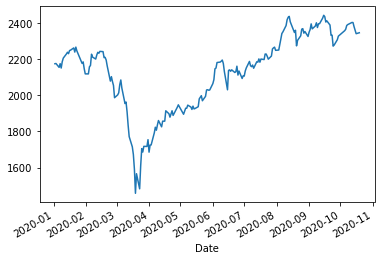

In [45]:
# KOSPI, KOSDAQ, NASDAQ 종합 지수, 2010년 1월~현재
kospi = fdr.DataReader('KS11', '2020')
kosdaq = fdr.DataReader('KQ11', '2020')
nasdaq = fdr.DataReader('IXIC', '2020')

# KOSPI 2010년 1월~현재 종가 그래프
kospi['Close'].plot()

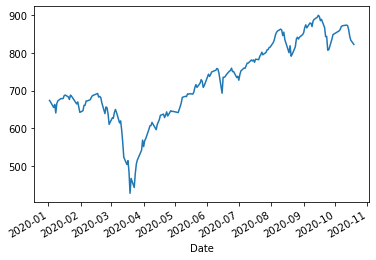

In [46]:
# KOSDAQ 2010년 1월~현재 종가 그래프
kosdaq['Close'].plot()

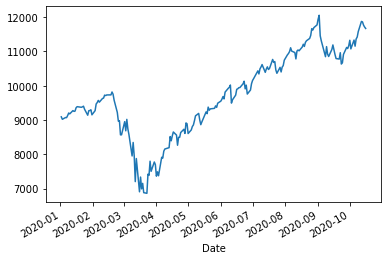

In [47]:
# NASDAQ 2010년 1월~현재 종가 그래프
nasdaq['Close'].plot()

In [48]:
# 날짜를 인덱스에서 컬럼으로 꺼내옴
kospi = kospi.reset_index()
kosdaq = kosdaq.reset_index()
nasdaq = nasdaq.reset_index()

In [163]:
# 코스피에서 주차(Week) 정보와 요일(Day) 정보를 만들고, 매주 금요일 일자와 종가를 추출
kospi["Week"] = kospi["Date"].dt.week
kospi["Day"] = kospi["Date"].dt.dayofweek
kospi = kospi[["Date", "Week", "Day", "Close"]]
kospi = kospi[kospi["Day"].isin([4])]
kospi = kospi[["Date", "Week", "Day", "Close"]]

#저장하기
kospi.to_excel('독립_KOSPI.xlsx', index=False, encoding="utf8")
kospi = pd.read_excel('독립_KOSPI.xlsx')
kospi.head()

,Date,Week,Day,Close
0,2020-01-03,1,4,2176.46
1,2020-01-10,2,4,2206.39
2,2020-01-17,3,4,2250.57
3,2020-01-31,5,4,2119.01
4,2020-02-07,6,4,2211.95


In [164]:
# 코스닥에서 주차(Week) 정보와 요일(Day) 정보를 만들고, 매주 금요일 일자와 종가를 추출
kosdaq["Week"] = kosdaq["Date"].dt.week
kosdaq["Day"] = kosdaq["Date"].dt.dayofweek
kosdaq = kosdaq[["Date", "Week", "Day", "Close"]]
kosdaq = kosdaq[kosdaq["Day"].isin([4])]
kosdaq = kosdaq[["Date", "Week", "Day", "Close"]]

# 저장하기
kosdaq.to_excel('독립_KOSDAQ.xlsx', index=False, encoding="utf8")
kosdaq = pd.read_excel('독립_KOSDAQ.xlsx')
kosdaq.head()

,Date,Week,Day,Close
0,2020-01-03,1,4,669.93
1,2020-01-10,2,4,673.03
2,2020-01-17,3,4,688.41
3,2020-01-31,5,4,642.48
4,2020-02-07,6,4,672.63


In [165]:
# 나스닥에서 주차(Week) 정보와 요일(Day) 정보를 만들고, 매주 금요일 일자와 종가를 추출
nasdaq["Week"] = nasdaq["Date"].dt.week
nasdaq["Day"] = nasdaq["Date"].dt.dayofweek
nasdaq = nasdaq[["Date", "Week", "Day", "Close"]]
nasdaq = nasdaq[nasdaq["Day"].isin([4])]
nasdaq = nasdaq[["Date", "Week", "Day", "Close"]]

# 저장하기
nasdaq.to_excel('독립_NASDAQ.xlsx', index=False, encoding="utf8")
nasdaq = pd.read_excel('독립_NASDAQ.xlsx')
nasdaq.head()

,Date,Week,Day,Close
0,2020-01-03,1,4,9020.77
1,2020-01-10,2,4,9178.86
2,2020-01-17,3,4,9388.94
3,2020-01-24,4,4,9314.91
4,2020-01-31,5,4,9150.94


### 3) WICS 지수
- 원본데이터 출처: WICS  
  'WICS_index.csv'  
- **WICS** (WISE Industry Classification Standard) 업종 분류의 업종은 국제적으로 통용되는 분류 기준을 국내 실정에 맞게 재구성하여 크게 대분류, 중분류, 소분류, 세개 분류로 나누어진다. 분류 종목은 대부분 지수 편입 종목이 된다. ([자세히](http://www.wiseindex.com/konannas/files/WICS_Sector_Index_Methodology.pdf?20200831))

In [166]:
# 원본데이터
wics = pd.read_csv('WICS_index.csv')

In [167]:
# 문자열 일자 데이터를 날짜형 데이터로 변환
wics['일자'] = pd.to_datetime(wics['일자'])

In [168]:
# ' 소재' 컬럼의 빈칸 조정
wics.columns = ['일자', '경기관련소비재', '에너지', '소재', '산업재', '필수소비재', '건강관리', 
                '금융', 'IT', '커뮤니케이션서비스', '유틸리티']

# ','가 있던 숫자 값의 쉼표 제거 및 float으로 변환
wics['경기관련소비재']=wics['경기관련소비재'].replace(',','',regex=True).astype(float)
wics['에너지']=wics['에너지'].replace(',','',regex=True).astype(float)
wics['소재']=wics['소재'].replace(',','',regex=True).astype(float)
wics['산업재']=wics['산업재'].replace(',','',regex=True).astype(float)
wics['필수소비재']=wics['필수소비재'].replace(',','',regex=True).astype(float)
wics['건강관리']=wics['건강관리'].replace(',','',regex=True).astype(float)
wics['금융']=wics['금융'].replace(',','',regex=True).astype(float)
wics['IT']=wics['IT'].replace(',','',regex=True).astype(float)
wics['커뮤니케이션서비스']=wics['커뮤니케이션서비스'].replace(',','',regex=True).astype(float)
wics['유틸리티']=wics['유틸리티'].replace(',','',regex=True).astype(float)

In [217]:
# 요일과 주차 데이터 추출.
wics["요일"] = wics["일자"].dt.dayofweek
wics["주차"] = wics["일자"].dt.week

# 주차와 요일 컬럼 추가 및 정렬.
wics = wics.reindex(columns=['일자', '주차', '요일', '경기관련소비재', '에너지', '소재', '산업재', '필수소비재', '건강관리', '금융', 'IT',
                             '커뮤니케이션서비스', '유틸리티'])

# 오래된 일자 순으로 정렬하고 인덱스 리셋.
wics = wics.sort_values(by='일자', ascending=True)
wics = wics.reset_index(drop=True)
# 금요일 데이터만 남기기.
wics = wics[wics["요일"].isin([4])]
wics = wics[['일자', '주차', '요일', '경기관련소비재', '에너지', '소재', '산업재', '필수소비재', '건강관리', '금융', 'IT',
                             '커뮤니케이션서비스', '유틸리티']]
# 저장하기
wics.to_excel('독립_WICS.xlsx', index=False, encoding="utf8")
wics = pd.read_excel('독립_WICS.xlsx')
wics.head()

,일자,주차,요일,경기관련소비재,에너지,소재,산업재,필수소비재,건강관리,금융,IT,커뮤니케이션서비스,유틸리티
0,2017-10-13,41,4,3251.15,5856.65,3458.18,1854.56,5739.83,4665.15,1844.58,2166.07,278.59,1078.17
1,2017-10-20,42,4,3295.80,5818.19,3529.94,1882.39,5873.09,4800.06,1833.57,2158.81,278.00,1117.76
2,2017-10-27,43,4,3434.22,5761.43,3577.55,1888.69,5900.89,4853.54,1849.30,2144.91,273.64,1063.97
3,2017-11-03,44,4,3508.02,5772.44,3566.09,1905.14,5944.67,5009.34,1849.43,2252.06,277.89,1070.47
4,2017-11-10,45,4,3537.89,5803.78,3528.84,1894.80,6128.82,5088.39,1784.60,2251.42,269.10,1059.81


최종 데이터셋의 컬럼은 아래와 같다.
**WICS 지수**
- 날짜
- 주차
- 경기관련소비재, 에너지, 소재, 산업재, 필수소비재, 건강관리, 금융, IT, 커뮤니케이션서비스, 유틸리티

## 1-3. 뉴스 데이터

---

- 주가와 주식 관련한 각종 지수는 그 어떤 영역보다도 복잡계에 해당한다. (그렇지 않았다면 모두가 투자로 부자 되었을 것) 도메인 전문가 인터뷰를 통해 주가에 영향을 줄 수 있는 대표적인 요소들을 추가로 확인하고 분석에 활용했다.


- 원본데이터 출처: 빅카인즈(한국언론진흥재단에서 운영하는 뉴스 데이터 서비스  
  '한국은행.xlsx'  
  '연준.xlsx'  
  '바이오헬스.xlsx'
  
  
- 3개의 데이터셋은 전부 키워드 검색 결과 나온 뉴스 기사를 일자별로 수집한 뒤, 주차별 주간 기사 수 합계를 구했다.  

  1) 한국은행의 통화 정책 관련 키워드 뉴스 수  
  2) 미국 연방준비위원회의 통화 정책 관련 키워드 뉴스 수  
  3) 정부의 미래 투자 산업 관련 키워드 뉴스 수  
  
- 각각의 키워드는 아래와 같다.
    1. 디지털 뉴딜, 그린 뉴딜, 바이오 헬스, 시스템 반도체, 소부장, 자율주행, 5G, 태양광
    2. 한국은행, 돈 풀다, 광의통화, 시중 유동성, 통화승수, 돈맥경화, 통화 증가세, 본원통화
    3. 연준, 돈 풀다, 광의통화, 시중 유동성, 통화승수, 돈맥경화, 통화 증가세, 본원통화

### 1) 한국은행의 통화 정책 관련 뉴스 수

In [170]:
import pandas as pd
from datetime import datetime

In [171]:
# 원본데이터
kr_bank = pd.read_excel('한국은행.xlsx')

In [172]:
# 필요한 컬럼만 남기기.
kr_bank = kr_bank[['일자']]

# 컬럼명 변경하기
kr_bank.columns = ["Date"]

# Datetime 으로 변경하기.
kr_bank['Date'] = pd.to_datetime(kr_bank['Date'], format='%Y%m%d')

# '주차' 생성 및 추가하기.
kr_bank["Week"] = kr_bank["Date"].dt.week
kr_bank = kr_bank[['Date','Week']]
kr_bank = kr_bank.sort_values(by=['Date'], axis=0, ascending=True)

# "주차"로 groupby 한 다음 일자 합계로 "주간 기사 수"를 구합니다.
kr_bank_w = kr_bank.groupby(["Week"])["Date"].count()
# 용이한 가공을 위해 데이터프레임으로 만들어줍니다.
kr_bank_weekly = pd.DataFrame(kr_bank_w)
kr_bank_weekly.columns = ["KR_bank"]
kr_bank_weekly.head()
kr_bank = kr_bank.merge(kr_bank_weekly, left_on="Week", right_on=kr_bank_weekly.index, how="left")

# '요일' 생성 및 추가하기
kr_bank["Day"] = kr_bank["Date"].dt.dayofweek
kr_bank = kr_bank[['Date','Week','Day', 'KR_bank']]

# 최종 원하는 데이터는 '주간 확진자'와 '주간 사망자'.
# 금요일 주가를 기준으로 하는 주가 데이터와 합칠 예정이므로 금요일만 남기기.
kr_bank = kr_bank[kr_bank['Day'].isin([4])]

# 중복값 제거하기.
kr_bank = kr_bank.drop_duplicates()
kr_bank = kr_bank.drop_duplicates("Week", keep="first")

# 필요한 컬럼만 남기기.
kr_bank = kr_bank[['Date', 'Week', 'KR_bank']]

In [173]:
kr_bank.to_excel("독립_KR_bank.xlsx", index=False, encoding="utf8")
kr_bank = pd.read_excel('독립_KR_bank.xlsx')
kr_bank.head()

,Date,Week,KR_bank
0,2020-01-17,3,32
1,2020-02-07,6,10
2,2020-02-14,7,46
3,2020-02-21,8,11
4,2020-02-28,9,53


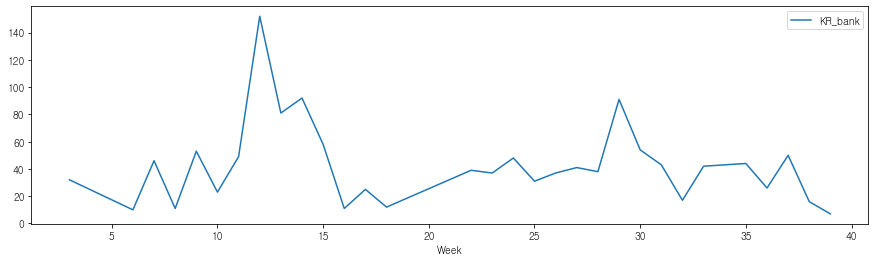

In [174]:
kr_bank.plot(x='Week', y='KR_bank', figsize=(15,4))

### 2) 미국 연방준비위원회의 통화 정책 관련 뉴스 수

In [175]:
import pandas as pd
from datetime import datetime

In [176]:
# 원본데이터
us_bank = pd.read_excel('연방.xlsx')

In [177]:
# 필요한 컬럼만 남기기.
us_bank = us_bank[['일자']]

# 컬럼명 변경하기
us_bank.columns = ["Date"]

# Datetime 으로 변경하기.
us_bank['Date'] = pd.to_datetime(us_bank['Date'], format='%Y%m%d')

# '주차' 생성 및 추가하기.
us_bank["Week"] = us_bank["Date"].dt.week
us_bank = us_bank[['Date','Week']]
us_bank = us_bank.sort_values(by=['Date'], axis=0, ascending=True)

# "주차"로 groupby 한 다음 일자 합계로 "주간 기사 수"를 구합니다.
us_bank_w = us_bank.groupby(["Week"])["Date"].count()
# 용이한 가공을 위해 데이터프레임으로 만들어줍니다.
us_bank_weekly = pd.DataFrame(us_bank_w)
us_bank_weekly.columns = ["US_bank"]
us_bank_weekly.head()
us_bank = us_bank.merge(us_bank_weekly, left_on="Week", right_on=us_bank_weekly.index, how="left")

# '요일' 생성 및 추가하기
us_bank["Day"] = us_bank["Date"].dt.dayofweek
us_bank = us_bank[['Date','Week','Day', 'US_bank']]

# 최종 원하는 데이터는 '주간 확진자'와 '주간 사망자'.
# 금요일 주가를 기준으로 하는 주가 데이터와 합칠 예정이므로 금요일만 남기기.
us_bank = us_bank[us_bank['Day'].isin([4])]

# 중복값 제거하기.
us_bank = us_bank.drop_duplicates()
us_bank = us_bank.drop_duplicates("Week", keep="first")

# 필요한 컬럼만 남기기.
us_bank = us_bank[['Date', 'Week', 'US_bank']]

In [178]:
us_bank.to_excel("독립_US_bank.xlsx", index=False, encoding="utf8")
us_bank = pd.read_excel('독립_US_bank.xlsx')
us_bank.head()

,Date,Week,US_bank
0,2020-01-17,3,16
1,2020-01-31,5,133
2,2020-02-07,6,55
3,2020-02-14,7,82
4,2020-02-21,8,56


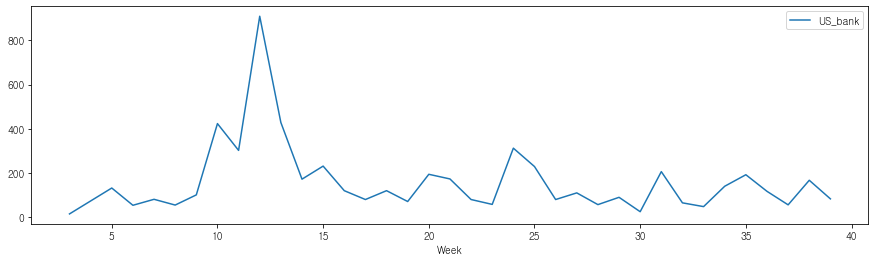

In [179]:
us_bank.plot(x='Week', y='US_bank', figsize=(15,4))

### 3) 정부의 미래 투자 산업 관련 뉴스 수

In [180]:
import pandas as pd
from datetime import datetime

In [181]:
# 원본데이터
biohealth = pd.read_excel('바이오 헬스.xlsx')

In [182]:
# 필요한 컬럼만 남기기
biohealth = biohealth[['일자']]

# 컬럼명 변경하기
biohealth.columns = ["Date"]

# Datetime 으로 데이터타입 변경하기
biohealth['Date'] = pd.to_datetime(biohealth['Date'], format='%Y%m%d')

# '주차'컬럼 생성 및 추가하기
biohealth["Week"] = biohealth["Date"].dt.week
biohealth = biohealth[['Date','Week']]
biohealth = biohealth.sort_values(by=['Date'], axis=0, ascending=True)
# "주차"로 groupby 한 다음 일자 합계로 "주간 기사 수" 구하기
biohealth = biohealth.groupby(["Week"])["Date"].count()
# 용이한 가공을 위해 데이터프레임으로 생성
biohealth_weekly = pd.DataFrame(biohealth)
biohealth_weekly.rename(columns={"Date":"바이오헬스"}, inplace=True)
biohealth_weekly.rename(columns={"Week":"주차"}, inplace=True)

# 인덱스'week'를 컬럼으로 변경
biohealth_weekly.reset_index(level=['Week'], inplace = True)
biohealth_weekly.head()

,Week,바이오헬스
0,3,7
1,4,54
2,5,20
3,6,24
4,7,26


In [183]:
# 위와 같이 정제된 각 단어들을 merge한 최종 결과 아래와 같다.
언론언급 = pd.read_excel('언론 언급.xlsx')
언론언급.head()

,일자,주차,디지털 뉴딜,그린 뉴딜,바이오 헬스,시스템 반도체,소부장,자율주행,5G,태양광
0,2020-01-17,3,0,0,7,30,4,19,52,28
1,2020-01-24,4,1,19,54,66,50,43,116,103
2,2020-01-31,5,2,13,20,50,45,35,217,64
3,2020-02-07,6,5,21,24,84,14,44,144,98
4,2020-02-14,7,5,24,26,53,22,56,158,105


## 1-4. 독립변수 / 종속변수 정리

**종속변수** 
   - (연속형) **양뱡향미디어와서비스** 업종 10개 기업
   - (연속형) **호텔, 레스토랑, 레저** 업종 20개 기업


**독립변수**  
   - (연속형) **한국 코로나 신규 확진자 수**
   - (연속형) **한국 코로나 신규 사망자 수**
   - (연속형) **세계 코로나 신규 확진자 수**
   - (연속형) **한국은행 통화 유동성 관련 키워드 뉴스 수**
   - (연속형) **미 연방준비제도 통화 유동성 관련 키워드 뉴스 수**
   - (연속형) **나스닥 지수**


**순서**
1. 종속변수 각 10개, 20개 항목 merge  
2. 독립변수 6개 항목 merge
3. 종속변수와 독립변수 merge

### 1) 종속변수

**1. 양방향미디어와서비스 10개 기업 주가 merge**

In [184]:
# 10개 데이터 불러와서 merge하기 생략하고 미리 만든 결과만 가져옴.
# 양방향미디어와서비스.to_excel("양방향미디어와서비스.xlsx", index=False, encoding="utf8")
양방향미디어와서비스 = pd.read_excel("양방향미디어와서비스.xlsx")
양방향미디어와서비스.head()

,Date_x,Week,카카오,NAVER,THE E&M,아프리카TV,줌인터넷,캐리소프트,키다리스튜디오,티사이언티픽,퓨쳐스트림네트웍스,플리토
0,2020-01-17,3,168500,191000,907,58000,4880,8370,3910,1495,1210,19350
1,2020-01-31,5,159000,179500,811,54000,3985,6910,3475,1565,1075,15250
2,2020-02-07,6,167500,185000,765,59100,4520,7080,3985,1615,1095,15800
3,2020-02-14,7,180000,186500,822,62300,4650,7380,4020,1720,1240,15900
4,2020-02-21,8,189500,189500,782,61200,4265,7900,4760,1630,1150,14700


**2. 호텔,레스토랑,레저 20개 기업 주가 merge**

In [185]:
# 20개 데이터 불러와서 merge하기 생략하고 결과만 가져옴.
#호텔레저.to_excel("호텔레스토랑레저.xlsx", index=False, encoding="utf8")
호텔레스토랑레저 = pd.read_excel("호텔레스토랑레저.xlsx")
호텔레스토랑레저.head()

,Date_x,Week,GKL,강원랜드,남화산업,노랑풍선,디딤,롯데관광개발,모두투어,서부T&D,...,시공테크,신세계푸드,아난티,용평리조트,이월드,참좋은여행,파라다이스,하나투어,해마로푸드서비스,호텔신라
0,2020-01-17,3,22250,28600,15150,15600,1950,15050,18150,8860,...,4765,73500,10750,6240,5480,6700,21550,56400,2730,108500
1,2020-01-31,5,18300,27550,13100,13500,1725,12850,14750,7370,...,4770,67400,9070,5350,4810,5700,17000,44900,2780,87400
2,2020-02-07,6,19000,27300,14650,13900,1740,13250,15700,7650,...,4990,68600,9770,5560,5250,5930,18600,49000,2930,92000
3,2020-02-14,7,19450,26650,14400,14300,1695,14050,16100,7400,...,4990,68200,9520,5510,5000,6260,19550,50500,3120,96800
4,2020-02-21,8,18350,25050,12950,13150,1620,12900,14800,7390,...,5310,63800,7600,4875,4500,5770,18000,45300,2980,88900


### 2) 독립변수

**주간 한국 확진자 수 / 한국 사망자 수 / 세계 확진자 수 / 한은 기사 수 / 연준 기사 수 / 나스닥 지수**

In [186]:
import pandas as pd

In [187]:
# 한국 코로나
kr_covid = pd.read_excel('독립_KR_covid.xlsx')
# 세계 코로나
wd_covid = pd.read_excel('독립_WD_covid.xlsx')
# 한국은행
kr_bank = pd.read_excel('독립_KR_bank.xlsx')
# 연방준비은행
us_bank = pd.read_excel('독립_US_bank.xlsx')
# 나스닥
nasdaq = pd.read_excel('독립_NASDAQ.xlsx')

In [188]:
# KR_covid + WD_covid
covid = kr_covid.merge(wd_covid, left_on="Week", right_on=wd_covid["Week"])
covid = covid[['Date_x', 'Week_x', 'KR_covid', 'KR_death', 'WD_covid' ]]
covid.columns = ['Date', 'Week',  'KR_covid', 'KR_death', 'WD_covid' ]

# KR_bank + US_bank
bank = kr_bank.merge(us_bank, left_on="Week", right_on=us_bank["Week"])
bank = bank[['Date_x', 'Week_x', 'KR_bank','US_bank' ]]
bank.columns = ['Date', 'Week', 'KR_bank', 'US_bank']

# covid + bank
covid_bank = covid.merge(bank, left_on="Week", right_on=bank["Week"])
covid_bank = covid_bank[['Date_x', 'Week_x', 'KR_covid', 'KR_death', 'WD_covid', 'KR_bank', 'US_bank' ]]
covid_bank.columns = ['Date', 'Week', 'KR_covid', 'KR_death', 'WD_covid', 'KR_bank', 'US_bank']

# covid_bank + nasdaq
independant = covid_bank.merge(nasdaq, left_on="Week", right_on=nasdaq["Week"])
independant = independant[['Date_x', 'Week_x', 'KR_covid', 'KR_death', 'WD_covid', 'KR_bank', 'US_bank', 'Close' ]]
independant.columns = ['Date', 'Week', 'KR_covid', 'KR_death', 'WD_covid', 'KR_bank', 'US_bank', 'Nasdaq']

In [189]:
# 저장하기
independant.to_excel("독립_covid_bank_nasdaq.xlsx", index=False, encoding="utf8")
independant = pd.read_excel("독립_covid_bank_nasdaq.xlsx")
independant.head()

,Date,Week,KR_covid,KR_death,WD_covid,KR_bank,US_bank,Nasdaq
0,2020-01-17,3,5,0,92,32,16,9388.94
1,2020-02-07,6,12,0,23013,10,55,9520.51
2,2020-02-14,7,2,0,31714,46,82,9731.18
3,2020-02-21,8,573,2,9629,11,56,9576.59
4,2020-02-28,9,3134,16,8441,53,102,8567.37


### 3) 종속변수 + 독립변수

**양방향미디어와서비스 + 독립변수**

In [190]:
IT미디어 = 양방향미디어와서비스

In [191]:
IT미디어_독립 = IT미디어.merge(independant, left_on="Week", right_on=independant["Week"])
# 필요한 컬럼만 가져오기
IT미디어_독립 = IT미디어_독립[['Date_x', 'Week_x', '카카오', 'NAVER', 'THE E&M', '아프리카TV', '줌인터넷',
                     '캐리소프트', '키다리스튜디오', '티사이언티픽', '퓨쳐스트림네트웍스', '플리토',
                     'KR_covid', 'KR_death', 'WD_covid', 'KR_bank', 'US_bank', 'Nasdaq']]
# 컬럼명  변경
IT미디어_독립.columns = ['Date', 'Week', '카카오', 'NAVER', 'THE EnM', '아프리카TV', '줌인터넷',
                     '캐리소프트', '키다리스튜디오', '티사이언티픽', '퓨쳐스트림네트웍스', '플리토',
                     'KR_covid', 'KR_death', 'WD_covid', 'KR_bank', 'US_bank', 'Nasdaq']

In [192]:
# 저장하고 확인하기
IT미디어_독립.to_excel("양방향미디어와서비스_독립.xlsx", index=False, encoding="utf8")
IT미디어_독립 = pd.read_excel("양방향미디어와서비스_독립.xlsx")
IT미디어_독립.head()

,Date,Week,카카오,NAVER,THE EnM,아프리카TV,줌인터넷,캐리소프트,키다리스튜디오,티사이언티픽,퓨쳐스트림네트웍스,플리토,KR_covid,KR_death,WD_covid,KR_bank,US_bank,Nasdaq
0,2020-01-17,3,168500,191000,907,58000,4880,8370,3910,1495,1210,19350,5,0,92,32,16,9388.94
1,2020-02-07,6,167500,185000,765,59100,4520,7080,3985,1615,1095,15800,12,0,23013,10,55,9520.51
2,2020-02-14,7,180000,186500,822,62300,4650,7380,4020,1720,1240,15900,2,0,31714,46,82,9731.18
3,2020-02-21,8,189500,189500,782,61200,4265,7900,4760,1630,1150,14700,573,2,9629,11,56,9576.59
4,2020-02-28,9,172000,174000,682,54500,4020,5800,4365,1380,1125,12250,3134,16,8441,53,102,8567.37


**호텔레스토랑레저 + 독립변수**

In [193]:
호텔레저 = 호텔레스토랑레저

In [194]:
호텔레저_독립 = 호텔레저.merge(independant, left_on="Week", right_on=independant["Week"])
# 필요한 컬럼만 가져오기.
호텔레저_독립 = 호텔레저_독립[['Date_x', 'Week_x', 'GKL', '강원랜드', '남화산업', '노랑풍선', '디딤',
                   '롯데관광개발', '모두투어', '서부T&D', '세중', '시공테크', '신세계푸드', '아난티', '용평리조트',
                   '이월드', '참좋은여행', '파라다이스', '하나투어', '해마로푸드서비스', '호텔신라',
                   'KR_covid', 'KR_death', 'WD_covid', 'KR_bank', 'US_bank', 'Nasdaq']]
# 컬럼명 변경하기.
호텔레저_독립.columns = ['Date', 'Week', 'GKL', '강원랜드', '남화산업', '노랑풍선', '디딤',
                   '롯데관광개발', '모두투어', '서부T&D', '세중', '시공테크', '신세계푸드', '아난티', '용평리조트',
                   '이월드', '참좋은여행', '파라다이스', '하나투어', '해마로푸드서비스', '호텔신라',
                   'KR_covid', 'KR_death', 'WD_covid', 'KR_bank', 'US_bank', 'Nasdaq']

In [195]:
# 저장하고 확인하기
호텔레저_독립.to_excel("호텔레스토랑레저_독립.xlsx", index=False, encoding="utf8")
호텔레저_독립 = pd.read_excel("호텔레스토랑레저_독립.xlsx")
호텔레저_독립.head()

,Date,Week,GKL,강원랜드,남화산업,노랑풍선,디딤,롯데관광개발,모두투어,서부T&D,...,파라다이스,하나투어,해마로푸드서비스,호텔신라,KR_covid,KR_death,WD_covid,KR_bank,US_bank,Nasdaq
0,2020-01-17,3,22250,28600,15150,15600,1950,15050,18150,8860,...,21550,56400,2730,108500,5,0,92,32,16,9388.94
1,2020-02-07,6,19000,27300,14650,13900,1740,13250,15700,7650,...,18600,49000,2930,92000,12,0,23013,10,55,9520.51
2,2020-02-14,7,19450,26650,14400,14300,1695,14050,16100,7400,...,19550,50500,3120,96800,2,0,31714,46,82,9731.18
3,2020-02-21,8,18350,25050,12950,13150,1620,12900,14800,7390,...,18000,45300,2980,88900,573,2,9629,11,56,9576.59
4,2020-02-28,9,16800,22800,11800,11850,1375,10450,14150,6780,...,16400,42300,2685,80300,3134,16,8441,53,102,8567.37


# 본론2. EDA 시각화 및 회귀분석

## 2-1. EDA 시각화

---

In [196]:
# 각종 라이브러리 불러오기
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.pylab as pylab
from matplotlib import pyplot
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

Text(0.3, 0.3, '한글')

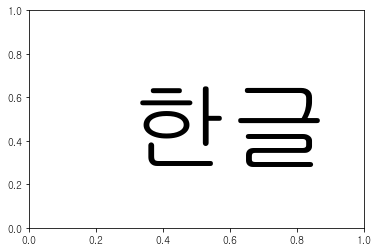

In [197]:
# 시각화 자료에서의 한글 사용을 위한 준비
plt.rc('font', family='Gulim')
plt.text(0.3, 0.3, '한글', size=100)

# 맥에서는 아래와 같이
# plt.rcParams['font.family'] = 'AppleGothic'

### 코로나19 세계 현황

In [198]:
# 주차별 세계 코로나19 확진자 데이터 불러오기
wd_covid = pd.read_excel("독립_WD_covid.xlsx")
wd_covid.head()

,Date,Week,WD_covid,WD_death
0,2020-01-17,3,92,2
1,2020-01-24,4,1928,53
2,2020-01-31,5,12561,249
3,2020-02-07,6,23013,508
4,2020-02-14,7,31714,857


In [199]:
# 컬럼명 변경
wd_covid.columns = ['날짜', '주차', '주간 확진자', '주간 사망자']

In [200]:
# 세계 코로나 주간 확진자와 주간 사망자 상관계수
# 다중공선성을 고려하여 주간 신규 확진자 데이터만 분석에 활용
wd_covid[['주간 확진자', '주간 사망자']].corr()

,주간 확진자,주간 사망자
주간 확진자,1.000000,0.759855
주간 사망자,0.759855,1.000000


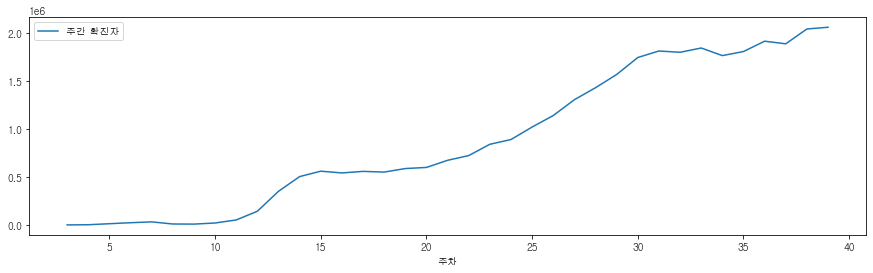

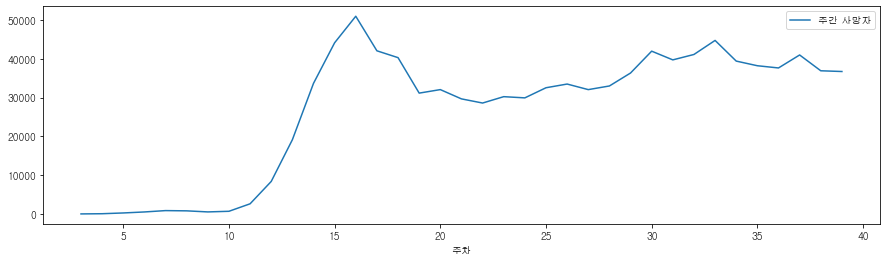

In [201]:
# 세계 주간 신규 확진자 및 사망자 추이
wd_covid.plot(x='주차', y='주간 확진자', figsize=(15,4))
wd_covid.plot(x='주차', y='주간 사망자', figsize=(15,4))

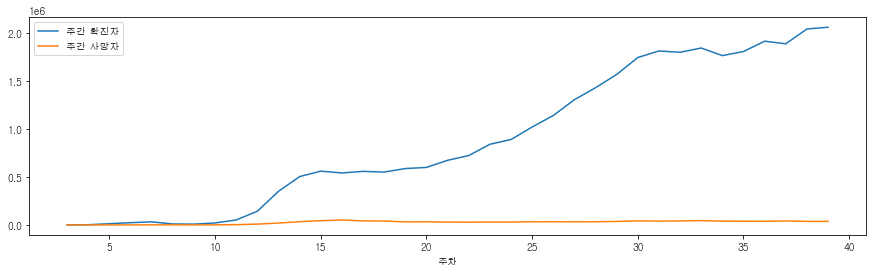

In [202]:
wld_total = wd_covid[['주차','주간 확진자','주간 사망자']]

# 첫 컬럼(date)를 인덱스로 convert
wld_total = wld_total.set_index('주차')
wld_total.plot(figsize=(15,4))

### 코로나19 한국 현황

In [203]:
# 주차별 한국 코로나19 확진자 데이터 불러오기
kr_covid = pd.read_excel('독립_KR_covid.xlsx')

In [204]:
kr_covid.head()

,Date,Week,KR_covid,KR_death
0,2020-01-17,3,5,0
1,2020-01-24,4,2,0
2,2020-01-31,5,12,0
3,2020-02-07,6,12,0
4,2020-02-14,7,2,0


In [205]:
# 컬럼명 변경
kr_covid.columns = ['날짜', '주차', '주간 확진자', '주간 사망자']

In [206]:
# 한국 코로나19 주간 신규 확진자와 주간 신규 사망자 상관계수
kr_covid[['주간 확진자','주간 사망자']].corr()

,주간 확진자,주간 사망자
주간 확진자,1.000000,0.396371
주간 사망자,0.396371,1.000000


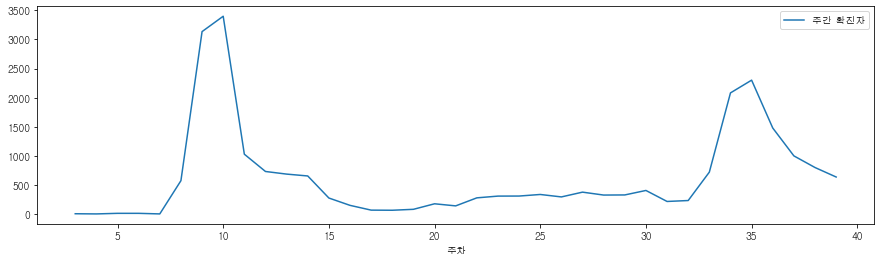

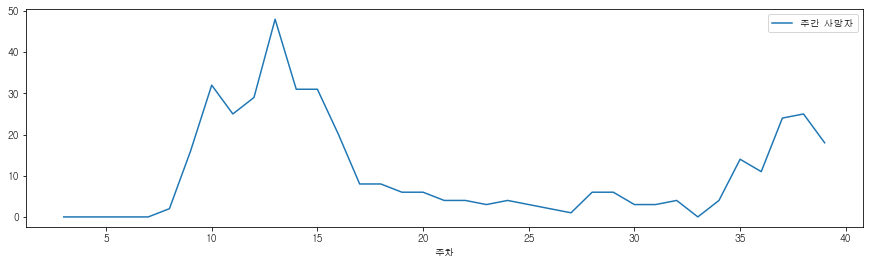

In [207]:
# 한국의 주간 신규 확진자 및 사망자 추이

kr_covid.plot(x='주차', y='주간 확진자', figsize=(15,4))
kr_covid.plot(x='주차', y='주간 사망자', figsize=(15,4))

In [208]:
#한국의 주간 확진자 주간 사망자 수 그래프로 한 번에

kr_total=kr_covid[['주차','주간 확진자','주간 사망자']]
kr_total.head()

# 첫 컬럼(date)를 인덱스로 convert
kr_total = kr_total.set_index('주차')
kr_total.head()

,주간 확진자,주간 사망자
주차,,
3,5,0
4,2,0
5,12,0
6,12,0
7,2,0


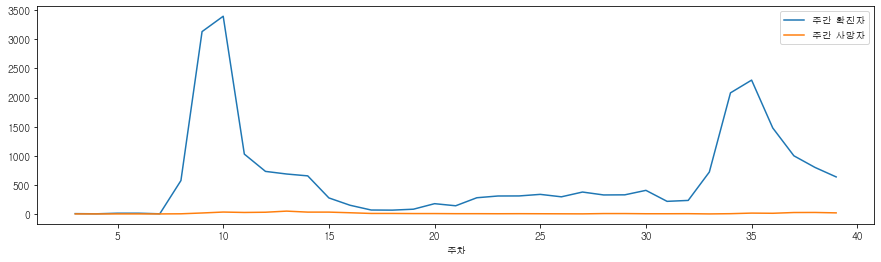

In [209]:
kr_total.plot(figsize=(15,4))

### KOSPI, KOSDAQ, NASDAQ

In [210]:
kospi_eda = pd.read_excel("독립_KOSPI.xlsx")
kosdaq_eda = pd.read_excel("독립_KOSDAQ.xlsx")
nasdaq_eda = pd.read_excel("독립_NASDAQ.xlsx")

In [211]:
# 주차와 요일 정보를 삭제하고 날짜를 인덱스로 지정

kospi_eda = kospi_eda.drop("Week",1)
kospi_eda = kospi_eda.drop("Day",1)
kospi_eda = kospi.set_index('Date')

kosdaq_eda = kospi_eda.drop("Week",1)
kosdaq_eda = kospi_eda.drop("Day",1)
kosdaq_eda = kospi.set_index('Date')

nasdaq_eda = kospi_eda.drop("Week",1)
nasdaq_eda = kospi_eda.drop("Day",1)
nasdaq_eda = kospi.set_index('Date')

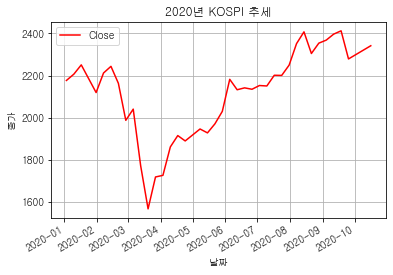

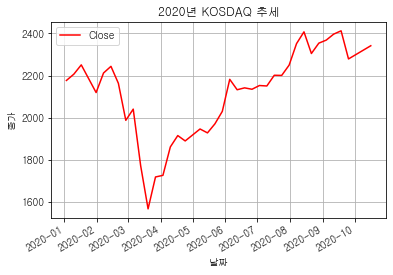

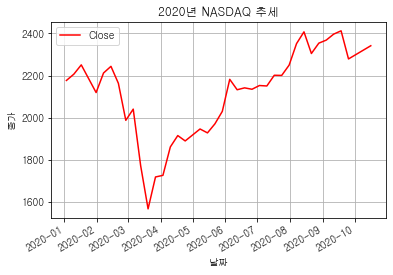

In [212]:
kospi_eda['Close'].plot(color='#ff0000') #색상 red적용
pyplot.grid() # 그래프 배경 그리드 추가
pyplot.legend() # legend(범례) 추가
pyplot.title("2020년 KOSPI 추세")
pyplot.xlabel("날짜")
pyplot.ylabel("종가")
pyplot.show() 

kosdaq_eda['Close'].plot(color='#ff0000') #색상 red적용
pyplot.grid() # 그래프 배경 그리드 추가
pyplot.legend() # legend(범례) 추가
pyplot.title("2020년 KOSDAQ 추세")
pyplot.xlabel("날짜")
pyplot.ylabel("종가")
pyplot.show() 

nasdaq_eda['Close'].plot(color='#ff0000') #색상 red적용
pyplot.grid() # 그래프 배경 그리드 추가
pyplot.legend() # legend(범례) 추가
pyplot.title("2020년 NASDAQ 추세")
pyplot.xlabel("날짜")
pyplot.ylabel("종가")
pyplot.show() 

### WICS 10개 대분류 산업군 추이

In [218]:
WICS_eda = pd.read_excel("독립_WICS.xlsx")
WICS_eda.head()

,일자,주차,요일,경기관련소비재,에너지,소재,산업재,필수소비재,건강관리,금융,IT,커뮤니케이션서비스,유틸리티
0,2017-10-13,41,4,3251.15,5856.65,3458.18,1854.56,5739.83,4665.15,1844.58,2166.07,278.59,1078.17
1,2017-10-20,42,4,3295.80,5818.19,3529.94,1882.39,5873.09,4800.06,1833.57,2158.81,278.00,1117.76
2,2017-10-27,43,4,3434.22,5761.43,3577.55,1888.69,5900.89,4853.54,1849.30,2144.91,273.64,1063.97
3,2017-11-03,44,4,3508.02,5772.44,3566.09,1905.14,5944.67,5009.34,1849.43,2252.06,277.89,1070.47
4,2017-11-10,45,4,3537.89,5803.78,3528.84,1894.80,6128.82,5088.39,1784.60,2251.42,269.10,1059.81


In [219]:
# 주차와 요일 정보를 삭제하고 날짜를 인덱스로 지정

WICS_eda = WICS_eda.drop("주차",1)
WICS_eda = WICS_eda.drop("요일",1)
WICS_eda = WICS_eda.set_index('일자')

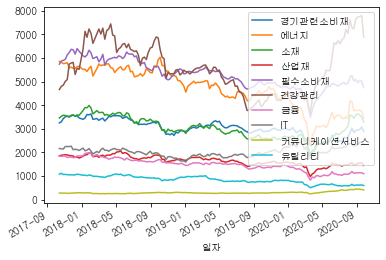

In [220]:
WICS_eda.plot()

### 호텔 레스토랑 레저 산업 부문 내 기업 상관관계 히트맵

In [221]:
import pandas as pd
import numpy as np
plt.rcParams['font.family'] = 'AppleGothic' # 애플 그래프 한글깨짐 방지

호텔레저_eda = pd.read_excel('호텔레스토랑레저.xlsx')
호텔레저_eda = 호텔레저_eda.drop('Week',1)
호텔레저_eda.head()

,Date_x,GKL,강원랜드,남화산업,노랑풍선,디딤,롯데관광개발,모두투어,서부T&D,세중,시공테크,신세계푸드,아난티,용평리조트,이월드,참좋은여행,파라다이스,하나투어,해마로푸드서비스,호텔신라
0,2020-01-17,22250,28600,15150,15600,1950,15050,18150,8860,3280,4765,73500,10750,6240,5480,6700,21550,56400,2730,108500
1,2020-01-31,18300,27550,13100,13500,1725,12850,14750,7370,2555,4770,67400,9070,5350,4810,5700,17000,44900,2780,87400
2,2020-02-07,19000,27300,14650,13900,1740,13250,15700,7650,2805,4990,68600,9770,5560,5250,5930,18600,49000,2930,92000
3,2020-02-14,19450,26650,14400,14300,1695,14050,16100,7400,2880,4990,68200,9520,5510,5000,6260,19550,50500,3120,96800
4,2020-02-21,18350,25050,12950,13150,1620,12900,14800,7390,2425,5310,63800,7600,4875,4500,5770,18000,45300,2980,88900


In [222]:
호텔레저_eda.corr().head()

,GKL,강원랜드,남화산업,노랑풍선,디딤,롯데관광개발,모두투어,서부T&D,세중,시공테크,신세계푸드,아난티,용평리조트,이월드,참좋은여행,파라다이스,하나투어,해마로푸드서비스,호텔신라
GKL,1.000000,0.813037,0.387425,0.088152,0.681553,-0.191634,0.901071,0.511642,0.153495,0.024844,0.788910,0.072387,0.800143,0.785648,0.637677,0.950044,0.906336,0.571260,0.944220
강원랜드,0.813037,1.000000,0.573796,0.380592,0.738964,0.127525,0.824690,0.688427,0.514888,0.448482,0.868816,0.534488,0.930220,0.835314,0.780358,0.828162,0.816247,0.614797,0.805576
남화산업,0.387425,0.573796,1.000000,0.400895,0.364685,0.244443,0.402657,0.687003,0.716853,0.345966,0.623645,0.511926,0.616081,0.660669,0.473759,0.432360,0.508096,0.391364,0.384355
노랑풍선,0.088152,0.380592,0.400895,1.000000,0.511700,0.805898,0.460433,0.703413,0.852473,0.398559,0.550945,0.687106,0.484356,0.101795,0.780641,0.337951,0.366717,0.589802,0.336655
디딤,0.681553,0.738964,0.364685,0.511700,1.000000,0.129440,0.822545,0.583970,0.443373,0.321144,0.784870,0.418045,0.800849,0.650978,0.815277,0.799855,0.779124,0.761351,0.789903


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


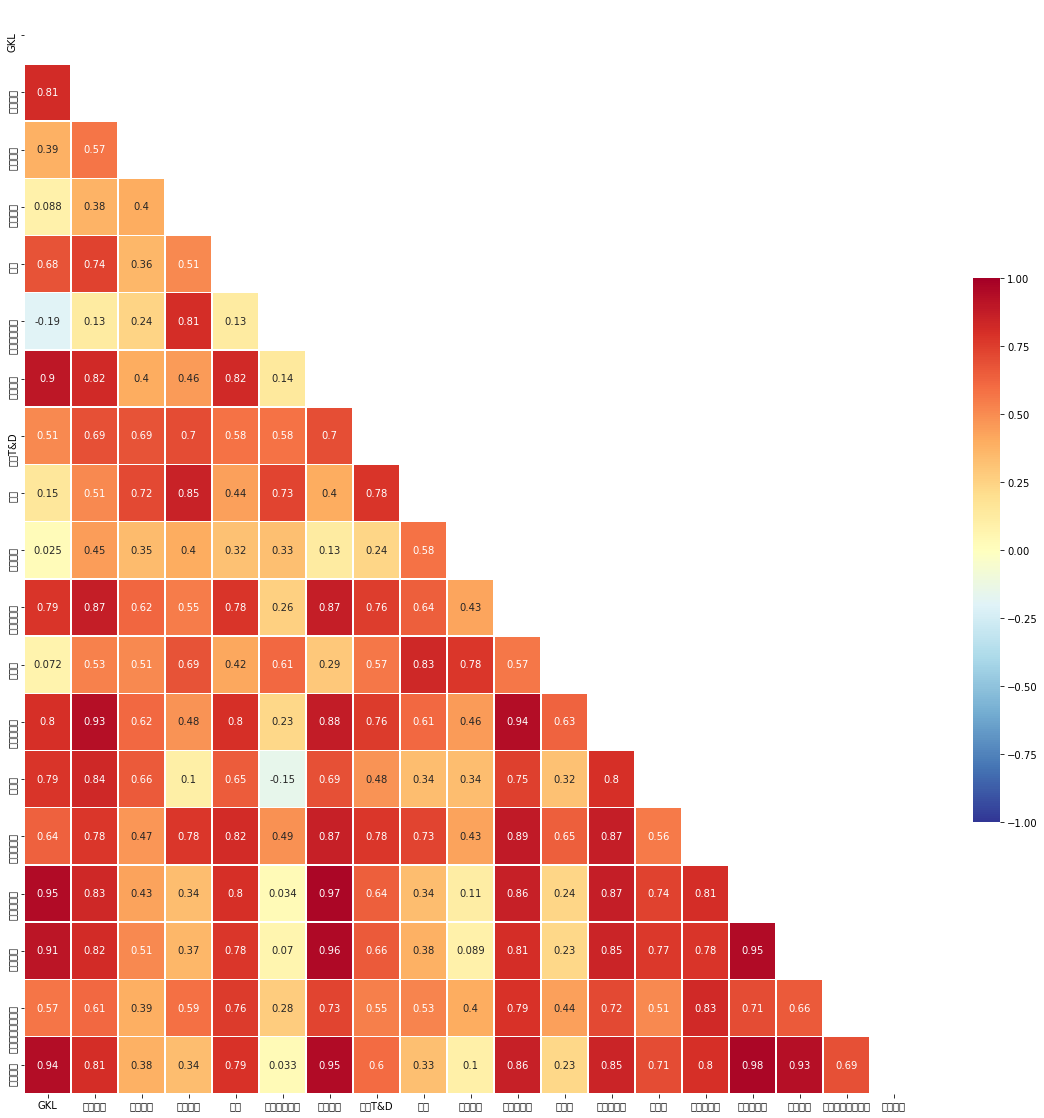

In [223]:
호텔레저_eda = 호텔레저_eda.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(20,20) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(호텔레저_eda, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(호텔레저_eda, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

In [224]:
IT미디어_eda = pd.read_excel('양방향미디어와서비스.xlsx')
IT미디어_eda = IT미디어_eda.drop('Week',1)
IT미디어_eda.head()

,Date_x,카카오,NAVER,THE E&M,아프리카TV,줌인터넷,캐리소프트,키다리스튜디오,티사이언티픽,퓨쳐스트림네트웍스,플리토
0,2020-01-17,168500,191000,907,58000,4880,8370,3910,1495,1210,19350
1,2020-01-31,159000,179500,811,54000,3985,6910,3475,1565,1075,15250
2,2020-02-07,167500,185000,765,59100,4520,7080,3985,1615,1095,15800
3,2020-02-14,180000,186500,822,62300,4650,7380,4020,1720,1240,15900
4,2020-02-21,189500,189500,782,61200,4265,7900,4760,1630,1150,14700


In [225]:
IT미디어_eda.corr().head()

,카카오,NAVER,THE E&M,아프리카TV,줌인터넷,캐리소프트,키다리스튜디오,티사이언티픽,퓨쳐스트림네트웍스,플리토
카카오,1.000000,0.989416,-0.034529,0.389624,0.063311,-0.406014,0.908333,0.962042,-0.218769,0.288500
NAVER,0.989416,1.000000,0.021983,0.450112,0.102350,-0.373120,0.903637,0.950947,-0.181971,0.345003
THE E&M,-0.034529,0.021983,1.000000,0.453994,0.475349,0.740430,-0.019412,0.033310,0.444071,0.802896
아프리카TV,0.389624,0.450112,0.453994,1.000000,0.441215,0.195220,0.419947,0.335104,0.371840,0.542380
줌인터넷,0.063311,0.102350,0.475349,0.441215,1.000000,0.460554,0.167859,-0.007582,0.451169,0.622529


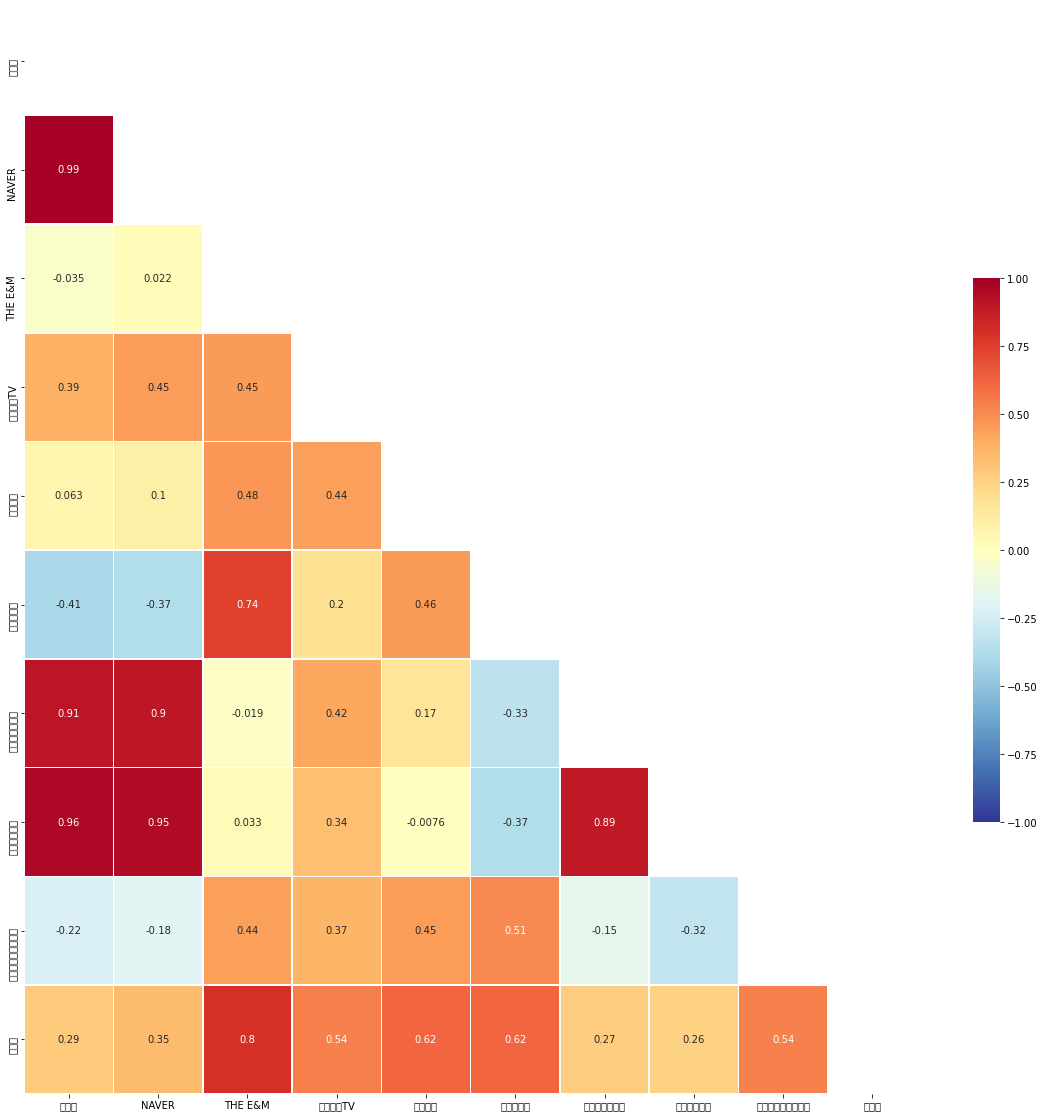

In [226]:
IT미디어_eda = IT미디어_eda.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots(figsize=(20,20) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(IT미디어_eda, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(IT미디어_eda, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

## 2-2. 회귀분석

**30개 기업 회귀분석을 위한 코드**  
반복문을 짜기는 했지만, 휴먼러닝이 약간 필요합니다. 

In [263]:
import pandas as pd
from statsmodels.formula.api import ols

In [264]:
# 위에서 작업한, 분석하려는 기업목록과 독립변수가 합쳐져 있는 파일 불러오기
호텔레저_독립 = pd.read_excel('호텔레스토랑레저_독립.xlsx')
IT미디어_독립 = pd.read_excel('양방향미디어와서비스_독립.xlsx')

### 코드: 호텔,레스토랑, 레저

In [265]:
# 분석할 기업목록 확인
호텔레저_list = ['GKL', 'MP그룹', '강원랜드', '남화산업', '노랑풍선', '디딤', '롯데관광개발',
             '모두투어', '서부TnD', '세중', '시공테크', '신세계푸드', '아난티', '용평리조트',
             '이월드', '참좋은여행', '파라다이스', '하나투어', '해마로푸드서비스', '호텔신라']

**반복문(1)**   
**Kc = KR_covid, KR_death / Wc = WD_covid / C = Kc, Wc / N = Nasdaq / Kb = KR_bank / Ub = US_bank**

In [266]:
# 호텔레저_list 안에 분석하려는 기업명 입력하기.
#KbUb 넣기
호텔레저_list = ['호텔신라']
for i in 호텔레저_list:
    Kc = i + 'Kc = ols(\"' + i + '~ KR_covid+KR_death\", data=호텔레저_독립).fit()'
    a = '#' + i + 'Kc.summary()'
    KcWc = i + 'KcWc = ols(\"' + i + ' ~ KR_covid+KR_death+WD_covid\", data=호텔레저_독립).fit()'
    b = '#' + i + 'KcWc.summary()'
    CN = i + 'CN = ols(\"' + i + '~ KR_covid+KR_death+WD_covid+Nasdaq\", data=호텔레저_독립).fit()'
    c = '#' + i + 'CN.summary()'
    CNKb = i + 'CNKb = ols(\"' + i + ' ~ KR_covid+KR_death+WD_covid+KR_bank+Nasdaq\", data=호텔레저_독립).fit()'
    d = '#' + i + 'CNKb.summary()'
    CNUb = i + 'CNUb = ols(\"' + i + ' ~ KR_covid+KR_death+WD_covid+US_bank+Nasdaq\", data=호텔레저_독립).fit()'
    e = '#' + i + 'CNUb.summary()'
    CNKbUb = i + 'CNKbUb = ols(\"' + i + ' ~ KR_covid+KR_death+WD_covid+KR_bank+US_bank+Nasdaq\", data=호텔레저_독립).fit()'
    f = '#' + i + 'CNKbUb.summary()'
    print(Kc)
    print(a)
    print(KcWc)
    print(b)
    print(CN)
    print(c)
    print(CNKb)
    print(d)
    print(CNUb)
    print(e)
    print(CNKbUb)
    print(f)

호텔신라Kc = ols("호텔신라~ KR_covid+KR_death", data=호텔레저_독립).fit()
#호텔신라Kc.summary()
호텔신라KcWc = ols("호텔신라 ~ KR_covid+KR_death+WD_covid", data=호텔레저_독립).fit()
#호텔신라KcWc.summary()
호텔신라CN = ols("호텔신라~ KR_covid+KR_death+WD_covid+Nasdaq", data=호텔레저_독립).fit()
#호텔신라CN.summary()
호텔신라CNKb = ols("호텔신라 ~ KR_covid+KR_death+WD_covid+KR_bank+Nasdaq", data=호텔레저_독립).fit()
#호텔신라CNKb.summary()
호텔신라CNUb = ols("호텔신라 ~ KR_covid+KR_death+WD_covid+US_bank+Nasdaq", data=호텔레저_독립).fit()
#호텔신라CNUb.summary()
호텔신라CNKbUb = ols("호텔신라 ~ KR_covid+KR_death+WD_covid+KR_bank+US_bank+Nasdaq", data=호텔레저_독립).fit()
#호텔신라CNKbUb.summary()


In [267]:
# 위 결과 새로운 셀에 복붙하기.
호텔신라Kc = ols("호텔신라~ KR_covid+KR_death", data=호텔레저_독립).fit()
#호텔신라Kc.summary()
호텔신라KcWc = ols("호텔신라 ~ KR_covid+KR_death+WD_covid", data=호텔레저_독립).fit()
#호텔신라KcWc.summary()
호텔신라CN = ols("호텔신라~ KR_covid+KR_death+WD_covid+Nasdaq", data=호텔레저_독립).fit()
#호텔신라CN.summary()
호텔신라CNKb = ols("호텔신라 ~ KR_covid+KR_death+WD_covid+KR_bank+Nasdaq", data=호텔레저_독립).fit()
#호텔신라CNKb.summary()
호텔신라CNUb = ols("호텔신라 ~ KR_covid+KR_death+WD_covid+US_bank+Nasdaq", data=호텔레저_독립).fit()
#호텔신라CNUb.summary()
호텔신라CNKbUb = ols("호텔신라 ~ KR_covid+KR_death+WD_covid+KR_bank+US_bank+Nasdaq", data=호텔레저_독립).fit()
#호텔신라CNKbUb.summary()

**반복문(2)**  
**분석 결과 별 R제곱, 수정R제곱, AIC, BIC**

In [287]:
# 호텔레저_list 안에 원하는 기업명 입력하기.
호텔레저_list = ['호텔신라']
for i in 호텔레저_list:
    result = i + '=pd.DataFrame({\"Kc\":[' + i + 'Kc.rsquared,' + i + 'Kc.rsquared_adj,' + i + 'Kc.aic,'+ i + 'Kc.bic],' + \
    '\"KcWc\":[' + i + 'KcWc.rsquared,'+ i + 'KcWc.rsquared_adj,'+  i + 'KcWc.aic,'+ i + 'KcWc.bic],' + \
    '\"CN\":[' + i + 'CN.rsquared,'+  i + 'CN.rsquared_adj,'+  i + 'CN.aic,'+  i + 'CN.bic],' + \
    '\"CNKb\":[' + i + 'CNKb.rsquared,'+  i + 'CNKb.rsquared_adj,'+  i + 'CNKb.aic,'+  i + 'CNKb.bic],' + \
    '\"CNUb\":[' + i + 'CNUb.rsquared,'+  i + 'CNUb.rsquared_adj,'+  i + 'CNUb.aic,'+  i + 'CNUb.bic],' + \
    '\"CNKbUb\":[' + i + 'CNKbUb.rsquared,'+  i + 'CNKbUb.rsquared_adj,'+  i + 'CNKbUb.aic,'+  i + 'CNKbUb.bic]})'
    print(result)

호텔신라=pd.DataFrame({"Kc":[호텔신라Kc.rsquared,호텔신라Kc.rsquared_adj,호텔신라Kc.aic,호텔신라Kc.bic],"KcWc":[호텔신라KcWc.rsquared,호텔신라KcWc.rsquared_adj,호텔신라KcWc.aic,호텔신라KcWc.bic],"CN":[호텔신라CN.rsquared,호텔신라CN.rsquared_adj,호텔신라CN.aic,호텔신라CN.bic],"CNKb":[호텔신라CNKb.rsquared,호텔신라CNKb.rsquared_adj,호텔신라CNKb.aic,호텔신라CNKb.bic],"CNUb":[호텔신라CNUb.rsquared,호텔신라CNUb.rsquared_adj,호텔신라CNUb.aic,호텔신라CNUb.bic],"CNKbUb":[호텔신라CNKbUb.rsquared,호텔신라CNKbUb.rsquared_adj,호텔신라CNKbUb.aic,호텔신라CNKbUb.bic]})


In [288]:
# 새로운 셀에 위 결과 복붙: R제곱, 수정 R제곱, AIC, BIC 데이터프레임화
호텔신라=pd.DataFrame({"Kc":[호텔신라Kc.rsquared,호텔신라Kc.rsquared_adj,호텔신라Kc.aic,호텔신라Kc.bic],"KcWc":[호텔신라KcWc.rsquared,호텔신라KcWc.rsquared_adj,호텔신라KcWc.aic,호텔신라KcWc.bic],"CN":[호텔신라CN.rsquared,호텔신라CN.rsquared_adj,호텔신라CN.aic,호텔신라CN.bic],"CNKb":[호텔신라CNKb.rsquared,호텔신라CNKb.rsquared_adj,호텔신라CNKb.aic,호텔신라CNKb.bic],"CNUb":[호텔신라CNUb.rsquared,호텔신라CNUb.rsquared_adj,호텔신라CNUb.aic,호텔신라CNUb.bic],"CNKbUb":[호텔신라CNKbUb.rsquared,호텔신라CNKbUb.rsquared_adj,호텔신라CNKbUb.aic,호텔신라CNKbUb.bic]})

In [289]:
# 결과
호텔신라

,Kc,KcWc,CN,CNKb,CNUb,CNKbUb
0,0.128360,0.476148,0.745755,0.747838,0.753901,0.753911
1,0.058628,0.410667,0.701538,0.690528,0.697969,0.683600
2,593.738215,581.481495,563.240040,565.009693,564.328255,566.327026
3,597.734829,586.810313,569.901062,573.002920,572.321482,575.652458


### 코드: 양방향미디어와서비스

In [271]:
# 분석할 기업목록 확인
IT미디어_list = ['Date', 'Week', '카카오', 'NAVER', 'THE E&M', '아프리카TV', '줌인터넷', '캐리소프트',
       '키다리스튜디오', '티사이언티픽', '퓨쳐스트림네트웍스', '플리토', 'KR_covid', 'KR_death',
       'WD_covid', 'KR_bank', 'US_bank', 'Nasdaq']

**반복문(1)**   
**Kc = KR_covid, KR_death / Wc = WD_covid / C = Kc, Wc / N = Nasdaq / Kb = KR_bank / Ub = US_bank**

In [272]:
# 호텔레저_list 안에 분석하려는 기업명 입력하기.
#KbUb 넣기
IT미디어_list = ['카카오']
for i in IT미디어_list:
    Kc = i + 'Kc = ols(\"' + i + '~ KR_covid+KR_death\", data=IT미디어_독립).fit()'
    a = '#' + i + 'Kc.summary()'
    KcWc = i + 'KcWc = ols(\"' + i + ' ~ KR_covid+KR_death+WD_covid\", data=IT미디어_독립).fit()'
    b = '#' + i + 'KcWc.summary()'
    CN = i + 'CN = ols(\"' + i + '~ KR_covid+KR_death+WD_covid+Nasdaq\", data=IT미디어_독립).fit()'
    c = '#' + i + 'CN.summary()'
    CNKb = i + 'CNKb = ols(\"' + i + ' ~ KR_covid+KR_death+WD_covid+KR_bank+Nasdaq\", data=IT미디어_독립).fit()'
    d = '#' + i + 'CNKb.summary()'
    CNUb = i + 'CNUb = ols(\"' + i + ' ~ KR_covid+KR_death+WD_covid+US_bank+Nasdaq\", data=IT미디어_독립).fit()'
    e = '#' + i + 'CNUb.summary()'
    CNKbUb = i + 'CNKbUb = ols(\"' + i + ' ~ KR_covid+KR_death+WD_covid+KR_bank+US_bank+Nasdaq\", data=IT미디어_독립).fit()'
    f = '#' + i + 'CNKbUb.summary()'
    print(Kc)
    print(a)
    print(KcWc)
    print(b)
    print(CN)
    print(c)
    print(CNKb)
    print(d)
    print(CNUb)
    print(e)
    print(CNKbUb)
    print(f)

카카오Kc = ols("카카오~ KR_covid+KR_death", data=IT미디어_독립).fit()
#카카오Kc.summary()
카카오KcWc = ols("카카오 ~ KR_covid+KR_death+WD_covid", data=IT미디어_독립).fit()
#카카오KcWc.summary()
카카오CN = ols("카카오~ KR_covid+KR_death+WD_covid+Nasdaq", data=IT미디어_독립).fit()
#카카오CN.summary()
카카오CNKb = ols("카카오 ~ KR_covid+KR_death+WD_covid+KR_bank+Nasdaq", data=IT미디어_독립).fit()
#카카오CNKb.summary()
카카오CNUb = ols("카카오 ~ KR_covid+KR_death+WD_covid+US_bank+Nasdaq", data=IT미디어_독립).fit()
#카카오CNUb.summary()
카카오CNKbUb = ols("카카오 ~ KR_covid+KR_death+WD_covid+KR_bank+US_bank+Nasdaq", data=IT미디어_독립).fit()
#카카오CNKbUb.summary()


In [281]:
카카오Kc = ols("카카오~ KR_covid+KR_death", data=IT미디어_독립).fit()
#카카오Kc.summary()
카카오KcWc = ols("카카오 ~ KR_covid+KR_death+WD_covid", data=IT미디어_독립).fit()
#카카오KcWc.summary()
카카오CN = ols("카카오~ KR_covid+KR_death+WD_covid+Nasdaq", data=IT미디어_독립).fit()
#카카오CN.summary()
카카오CNKb = ols("카카오 ~ KR_covid+KR_death+WD_covid+KR_bank+Nasdaq", data=IT미디어_독립).fit()
#카카오CNKb.summary()
카카오CNUb = ols("카카오 ~ KR_covid+KR_death+WD_covid+US_bank+Nasdaq", data=IT미디어_독립).fit()
#카카오CNUb.summary()
카카오CNKbUb = ols("카카오 ~ KR_covid+KR_death+WD_covid+KR_bank+US_bank+Nasdaq", data=IT미디어_독립).fit()
#카카오CNKbUb.summary()

**반복문(2)**  
**분석 결과 별 R제곱, 수정R제곱, AIC, BIC**

In [282]:
# IT미디어_list 안에 원하는 기업명 입력하기.
IT미디어_list = ['카카오']
for i in IT미디어_list:
    result = i + '=pd.DataFrame({\"Kc\":[' + i + 'Kc.rsquared,' + i + 'Kc.rsquared_adj,' + i + 'Kc.aic,'+ i + 'Kc.bic],' + \
    '\"KcWc\":[' + i + 'KcWc.rsquared,'+ i + 'KcWc.rsquared_adj,'+  i + 'KcWc.aic,'+ i + 'KcWc.bic],' + \
    '\"CN\":[' + i + 'CN.rsquared,'+  i + 'CN.rsquared_adj,'+  i + 'CN.aic,'+  i + 'CN.bic],' + \
    '\"CNKb\":[' + i + 'CNKb.rsquared,'+  i + 'CNKb.rsquared_adj,'+  i + 'CNKb.aic,'+  i + 'CNKb.bic],' + \
    '\"CNUb\":[' + i + 'CNUb.rsquared,'+  i + 'CNUb.rsquared_adj,'+  i + 'CNUb.aic,'+  i + 'CNUb.bic],' + \
    '\"CNKbUb\":[' + i + 'CNKbUb.rsquared,'+  i + 'CNKbUb.rsquared_adj,'+  i + 'CNKbUb.aic,'+  i + 'CNKbUb.bic]})'
    print(result)

카카오=pd.DataFrame({"Kc":[카카오Kc.rsquared,카카오Kc.rsquared_adj,카카오Kc.aic,카카오Kc.bic],"KcWc":[카카오KcWc.rsquared,카카오KcWc.rsquared_adj,카카오KcWc.aic,카카오KcWc.bic],"CN":[카카오CN.rsquared,카카오CN.rsquared_adj,카카오CN.aic,카카오CN.bic],"CNKb":[카카오CNKb.rsquared,카카오CNKb.rsquared_adj,카카오CNKb.aic,카카오CNKb.bic],"CNUb":[카카오CNUb.rsquared,카카오CNUb.rsquared_adj,카카오CNUb.aic,카카오CNUb.bic],"CNKbUb":[카카오CNKbUb.rsquared,카카오CNKbUb.rsquared_adj,카카오CNKbUb.aic,카카오CNKbUb.bic]})


In [286]:
# 새로운 셀에 위 결과 복붙: R제곱, 수정 R제곱, AIC, BIC 데이터프레임화
카카오=pd.DataFrame({"Kc":[카카오Kc.rsquared,카카오Kc.rsquared_adj,카카오Kc.aic,카카오Kc.bic],"KcWc":[카카오KcWc.rsquared,카카오KcWc.rsquared_adj,카카오KcWc.aic,카카오KcWc.bic],"CN":[카카오CN.rsquared,카카오CN.rsquared_adj,카카오CN.aic,카카오CN.bic],"CNKb":[카카오CNKb.rsquared,카카오CNKb.rsquared_adj,카카오CNKb.aic,카카오CNKb.bic],"CNUb":[카카오CNUb.rsquared,카카오CNUb.rsquared_adj,카카오CNUb.aic,카카오CNUb.bic],"CNKbUb":[카카오CNKbUb.rsquared,카카오CNKbUb.rsquared_adj,카카오CNKbUb.aic,카카오CNKbUb.bic]})

In [114]:
# 결과
카카오

,Kc,KcWc,CN,CNKb,CNUb,CNKbUb
0,0.096406,0.955853,0.973077,0.978988,0.977397,0.980095
1,0.024118,0.950335,0.968395,0.974212,0.972260,0.974408
2,720.833355,638.305209,626.457702,621.517966,623.561448,622.001754
3,724.829969,643.634027,633.118724,629.511193,631.554675,631.327185


### 다중회귀분석

### 예시(1) 호텔신라

Kc = KR_covid, KR_death / Wc = WD_covid / C = Kc, Wc / N = Nasdaq / Kb = KR_bank / Ub = US_bank

Korea corona:한국 확진+한국사망  
Korea corona World corona: 한국 확진+한국사망+ 세계 확진  
Corona Nasdaq:한국확진+한국사망+세계확진 + 나스닥  
Corona Nasdaq Korea bank:한국확진+한국사망+세계확진 + 나스닥 + 한은  
Corona Nasdaq Us bank: 한국확진+한국사망+세계확진 + 나스닥 + 한은 + 연준  
Corona Nasdaq Korea bank Us bank: 한국확진+한국사망+세계확진 + 나스닥 + 한은 + 연준 

In [290]:
호텔신라

,Kc,KcWc,CN,CNKb,CNUb,CNKbUb
0,0.128360,0.476148,0.745755,0.747838,0.753901,0.753911
1,0.058628,0.410667,0.701538,0.690528,0.697969,0.683600
2,593.738215,581.481495,563.240040,565.009693,564.328255,566.327026
3,597.734829,586.810313,569.901062,573.002920,572.321482,575.652458


설명:

In [291]:
호텔신라CNUb = ols("호텔신라 ~ KR_covid+KR_death+WD_covid+US_bank+Nasdaq", data=호텔레저_독립).fit()
호텔신라CNUb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   호텔신라   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     13.48
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           4.41e-06
Time:                        19:51:16   Log-Likelihood:                -276.16
No. Observations:                  28   AIC:                             564.3
Df Residuals:                      22   BIC:                             572.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    779.4568   2.13e+04      0.037      0.971   -4.35e+04     4.5e+04
KR_covid      -2.5190      1.512     -1.665      0.110      -5.656       0.618
KR_death     214.4774    146.136      1.468      0.156     -88.589     517.544
WD_covid      -0.0198      0.003     -6.500      0.000      -0.026      -0.013
US_bank       -6.5410      7.665     -0.853      0.403     -22.438       9.356
Nasdaq         9.9097      2.349      4.219      0.000       5.039      14.781
==============================================================================
Omnibus:                        8.988   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                7.883
Skew:                           0.894   Prob(JB):                       0.0194
Kurtosis:                       4.886   Cond. No.                     2.63e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 위는 여러 조합 중, 수정R^2 값이 가장 높은 한국 코로나 신규 확진자 + 한국 코로나 신규 사망자 + 세계 코로나 신규 확진자 + 나스닥 지수 + 미국 연준 보도 수를 독립변수로 한 다중회귀분석 결과이다.
- 한국 코로나 신규 확진자, 한국 코로나 신규 사망자, 미국 연준 보도 수를 모두 고려하고 나면, 세계 코로나 신규 확진자 수(음의 방향)와 나스닥 지수(양의 방향)는 통계적으로 유의미하게 주가와 연관이 있다.

### 예시(2) 카카오

Korea corona:한국 확진+한국사망  
Korea corona World corona: 한국 확진+한국사망+ 세계 확진  
Corona Nasdaq:한국확진+한국사망+세계확진 + 나스닥  
Corona Nasdaq Korea bank:한국확진+한국사망+세계확진 + 나스닥 + 한은  
Corona Nasdaq Us bank: 한국확진+한국사망+세계확진 + 나스닥 + 한은 + 연준  
Corona Nasdaq Korea bank Us bank: 한국확진+한국사망+세계확진 + 나스닥 + 한은 + 연준

In [292]:
카카오

,Kc,KcWc,CN,CNKb,CNUb,CNKbUb
0,0.096406,0.955853,0.973077,0.978988,0.977397,0.980095
1,0.024118,0.950335,0.968395,0.974212,0.972260,0.974408
2,720.833355,638.305209,626.457702,621.517966,623.561448,622.001754
3,724.829969,643.634027,633.118724,629.511193,631.554675,631.327185


In [293]:
카카오CNKbUb = ols("카카오 ~ KR_covid+KR_death+WD_covid+KR_bank+US_bank+Nasdaq", data=IT미디어_독립).fit()
카카오CNKbUb.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    카카오   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     172.3
Date:                Mon, 19 Oct 2020   Prob (F-statistic):           9.54e-17
Time:                        19:52:27   Log-Likelihood:                -304.00
No. Observations:                  28   AIC:                             622.0
Df Residuals:                      21   BIC:                             631.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.733e+05    6.7e+04     -2.587      0.017   -3.13e+05    -3.4e+04
KR_covid       8.3555      4.192      1.993      0.059      -0.363      17.074
KR_death     -18.2617    418.821     -0.044      0.966    -889.247     852.724
WD_covid       0.0684      0.009      7.401      0.000       0.049       0.088
KR_bank      229.7197    136.148      1.687      0.106     -53.416     512.855
US_bank       26.0231     24.074      1.081      0.292     -24.041      76.087
Nasdaq        36.1415      7.205      5.016      0.000      21.158      51.125
==============================================================================
Omnibus:                        8.973   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                7.224
Skew:                           1.134   Prob(JB):                       0.0270
Kurtosis:                       4.024   Cond. No.                     2.98e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- 위는 여러 조합 중, 수정R^2 값이 가장 높은 한국 코로나 신규 확진자 + 한국 코로나 신규 사망자 + 세계 코로나 신규 확진자 + 한국은행 보도 수 + 미국 연준 보도 수 + 나스닥 지수를 독립변수로 한 다중회귀분석 결과이다.
- 한국 코로나 신규 확진자, 한국 코로나 신규 사망자, 한국은행 보도 수, 미국 연준 보도 수를 모두 고려하고 나면, 세계 코로나 신규 확진자 수(양의 방향)와 나스닥 지수(양의 방향)는 통계적으로 유의미하게 주가와 연관이 있다.
- 세계 코로나 신규 확진자 수의 경우 양의 방향이며, 이는 호텔신라와 반대로 '세계 코로나19 확진자 수가 증가할수록 카카오의 주가가 상승한다'는 의미가 된다.

### 종합
30개 기업에 대한 회귀분석 결과를 표로 정리했다.
![title](img05.png)
- 독립변수 중, 다른 요소들을 고려했을 때 p값이 0.05 이하인 변수로 세계 확진자 수(22)와 나스닥(21)이 다수 나타났다. 나스닥은 모든 경우에서 양(+)의 상관관계를 보이지만, 세계 확진자 수는 양(-)과 음(-)의 상관관계를 보인다. 따라서 주가에 일관적인 영향을 준다고 보기 어렵다고 보인다.
- 독립변수 중, 연준 보도 수가 다른 요소들을 고려했을 때 p값이 0.05 이하로 나온 경우 모두 음(-)의 상관관계를 보인다. 이는 미국 연방준비제도에서 통화 유동성에 관한 보도가 적을수록 주가가 오른다는 의미다.

# 결론 및 한계점

## 결론

- 국내/외 코로나19 확진자, 사망자 수가 국내 기업 주가에는 영향을 준다는 근거를 찾기는 어렵다.
- 하지만 '국내 주가는 나스닥에 영향을 받는다'라는 상식을 데이터로 확인할 수 있었다.
- 한국은행과 미국 연준에서 통화량을 증가시킨다는 보도를 할수록, 시장 기대가 높아져 주가가 상승한다' 전문가 의견에 따라 '한국은행과 미국 연준 보도 수'를 코로나19 파생변수로 설정했으나 보도 데이터 수집의 정확한 집계가 어려워, 이를 뒷받침하는 데이터는 찾지 못했다.


## 한계점

- 코로나19 관련 데이터가 국내/세계 코로나 '확진자 및 사망자 수'로 한정되었다. 관련한 의미있는 다른 수치들도 함께 보면 더 좋은 분석이 되리라 생각한다.
- 종속변수인 기업 주가를 한정했기 때문에, 어떤 분야나 한국 주가 전체의 전반적인 추세로 일반화하기 어렵다.
- 정부가 투자할 산업에 관해 언론에서 많이 언급된 단어들과 연관된 산업들의 주가를 분석해보려 했지만, 크롤링과 어떤 산업의 주가 데이터를 정의하고 구할지에 관한 한계가 있어 진행되지 못했다.
- 주가 및 지수 데이터의 경우 주말에 값이 없어서 1주 1개 데이터(금요 종가)로 산출했고, 대응하는 코로나19 데이터도 주별로 산출(합산)되여 최종 데이터 크기가 아주 크진 않았다.

----

### "나 주린이, 코로나에 휩쓸리지 않겠어...!!!"